In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data 
xy = np.loadtxt('XY_ZeroB_Dic.txt', dtype=int, delimiter=',')
print(type(xy))
print(f"Number of trials to examine = {len(xy)/2}\nTotal Number of arrays = {len(xy)}")

<class 'numpy.ndarray'>
Number of trials to examine = 2.0
Total Number of arrays = 4


In [4]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy)

Data ratio set
Data ratio set


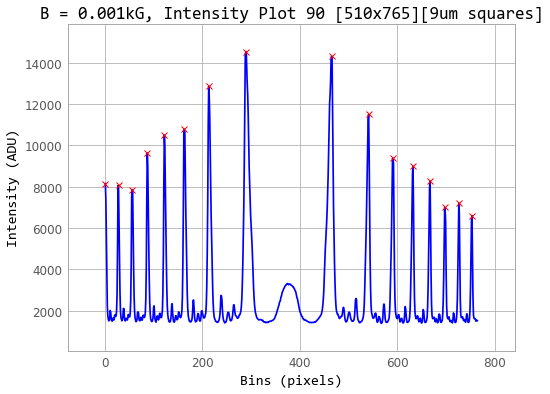

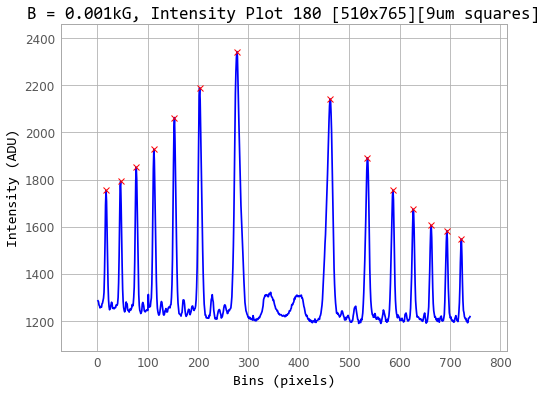

In [5]:
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy[0],xy[1],1,764,4000)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy[2],xy[3],1,740,1400)


hf.Plots(x_1,y_1, 
    'B = 0.001kG, Intensity Plot 90 [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=8
    )
hf.PlotNewPeaks(peaks1,xy[1])

hf.Plots(x_2,y_2, 
    'B = 0.001kG, Intensity Plot 180 [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks2,xy[3])



In [6]:
# print(len(peaks1))
# print(len(peaks2))

In [7]:
# STEP 6: CREATE RADIUS ARRAY 

# Graph 1
Radii1_meter_inner2outer = hf.RadiiMeterInner_to_Outer(peaks1)


# Graph 2
Radii2_meter_inner2outer = hf.RadiiMeterInner_to_Outer(peaks2)

In [8]:
# STEP 7: CREATE THETA ARRAYS 

# Graph 1
thetas1 = hf.ThetasRadArray(Radii1_meter_inner2outer)
T1 = thetas1**2

# Graph 2
thetas2 = hf.ThetasRadArray(Radii2_meter_inner2outer)
T2 = thetas2**2

In [9]:
# STEP 8: CREATE RING INDEX VALUES

# Graph1
index1 = np.arange(1,len(thetas1)+1)
print(index1)
print(type(index1))

# Graph1
index2 = np.arange(1,len(thetas2)+1)
print(index2)
print(type(index2))

[1 2 3 4 5 6 7 8]
<class 'numpy.ndarray'>
[1 2 3 4 5 6 7]
<class 'numpy.ndarray'>


In [10]:
# STEP 9: Error propagation

# ERROR IN MEASUREMENT OF PEAK 
sigma_xf_pixel = 1/2 #width/2
sigma_xf_meter = (1/2)*9*(10)**(-6) #Pixel x 9um x 10E-6= meter

sigma_xi_pixel = 1/2
sigma_xi_meter = (1/2)*9*(10)**(-6) #Pixel x 9um x 10E-6= meter

# ERROR PROPAGATION TO DIAMETER
var_D = sigma_xf_meter**2 + sigma_xi_meter**2
sigma_D_meter = np.sqrt(var_D)

# ERROR PROPAGATION TO RADIUS
sigma_R_meter = 0.5*sigma_D_meter

# ERROR PROPAGATION TO ANGLE THETA
f = 135E-3 # focal length 
var_theta = ((1/f)**2)*sigma_R_meter**2
sigma_theta = np.sqrt(var_theta)

Sig_theta_arr1 = sigma_theta*np.ones(len(thetas1))
Sig_theta_arr2 = sigma_theta*np.ones(len(thetas2))

# print(Sig_theta_arr1)
# print(Sig_theta_arr2)



$$
\sigma_{\theta^2} = (2\theta)(\sigma_{theta})
$$

In [11]:
# CONT. 
# from above formula 
sigTsq1 = 2*thetas1*Sig_theta_arr1
sigTsq2 = 2*thetas2*Sig_theta_arr2

In [12]:
# STEP 10: CREATE FIT FUNCTION 

# TH^2 = (Lambda/t)*index = A index One unknown


# One UNKNOWNS 
def Thetasq1(index,A):
    lambda_0 = 546.07E-9 #meters
    t = 0.6499E-2 # meters
    return A*index

p01 = [8.6E-05]




In [13]:
# STEP 11: APPLY FIT---------------GRAPH-1------------


# TWO UNKNOWNS 
print('Known: A = 8.402E-05 = lambda/t\n\nFit value:')
popt1, pcov1 = curve_fit( 
                    Thetasq1,
                    index1,
                    T1,
                    p0= p01, 
                    absolute_sigma=True,
                    sigma=sigTsq1
                    )

for i in range(0,len(popt1)):
    print('param ',i,' = ',popt1[i], '+/-', np.sqrt(pcov1[i,i]))



Known: A = 8.402E-05 = lambda/t

Fit value:
param  0  =  7.19501703609366e-05 +/- 6.664359329045905e-08


In [14]:
# STEP 11: APPLY FIT---------------GRAPH-2------------


# TWO UNKNOWNS 
print('Known: A = 8.402E-05 = lambda/t\n\nFit value:')
popt1_2, pcov1_2 = curve_fit( 
                    Thetasq1,
                    index2,
                    T2,
                    p0= p01, 
                    absolute_sigma=True,
                    sigma=sigTsq2
                    )

for i in range(0,len(popt1_2)):
    print('param ',i,' = ',popt1_2[i], '+/-', np.sqrt(pcov1_2[i,i]))



Known: A = 8.402E-05 = lambda/t

Fit value:
param  0  =  7.229327609451634e-05 +/- 7.574669313254277e-08


True Value: 
8.402369595322358e-05

Polyfit Value:
8.46079959463021e-05

Curve Fit Value: 
[7.19501704e-05]


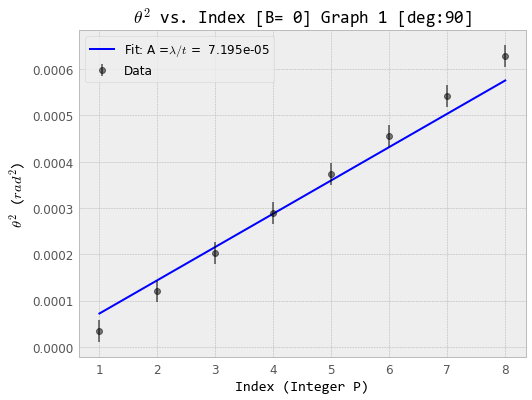

In [39]:
# PLOT1

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
i_line = np.linspace(min(index1), max(index1), 1000)
fit1 = Thetasq1(i_line, *popt1)

#data
plt.plot(i_line, fit1, label = 'Fit: A =$\\lambda/t$ =  %1.3e' % tuple(popt1), color = 'b')
# plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

plt.errorbar(
    index1, 
    T1, 
    yerr= Sig_theta_arr1, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title(f"$\\theta^2$ vs. Index [B= 0] Graph 1 [deg:90]", **hfont)
plt.xlabel('Index (Integer P)', **hfont)
plt.ylabel(f'$\\theta^2$ ($rad^2$)', **hfont)
plt.legend(loc=2)


lambda_0 = 546.07E-9 #meters
t = 0.6499E-2
print('True Value: ') 
print(lambda_0/t)
print('\nPolyfit Value:')
print(np.polyfit(index1,T1,1)[0])
print('\nCurve Fit Value: ')
print(popt1)

True Value: 
8.402369595322358e-05

Polyfit Value:
8.590673805568477e-05

Curve Fit Value: 
[7.22932761e-05]


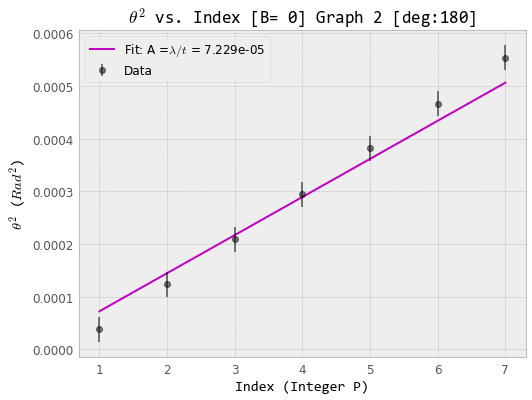

In [40]:
# PLOT2

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
i_line = np.linspace(min(index2), max(index2), 1000)
fit2 = Thetasq1(i_line, *popt1_2)

#data
plt.plot(i_line, fit2, label = 'Fit: A =$\\lambda/t$ = %1.3e' % tuple(popt1_2), color = 'm')
# plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

plt.errorbar(
    index2, 
    T2, 
    yerr= Sig_theta_arr2, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title(f"$\\theta^2$ vs. Index [B= 0] Graph 2 [deg:180]", **hfont)
plt.xlabel('Index (Integer P)', **hfont)
plt.ylabel(f'$\\theta^2$ ($Rad^2$)', **hfont)
plt.legend(loc=2)

lambda_0 = 546.07E-9 #meters
t = 0.6499E-2
print('True Value: ') 
print(lambda_0/t)
print('\nPolyfit Value:')
print(np.polyfit(index2,T2,1)[0])
print('\nCurve Fit Value: ')
print(popt1_2)

In [29]:
print('Fit - Graph 1: A = lambda/t')
hf.Chi2Values(Thetasq1,index1,T1,popt1,Sig_theta_arr1)

print('\nFit - Graph 2: A = lambda/t')
hf.Chi2Values(Thetasq1,index2,T2,popt1_2,Sig_theta_arr2)

Fit - Graph 1: A = lambda/t
Chi-square:  12.814829686441016
Degrees of freedom:  7
Reduced chi-square:  1.8306899552058593
CDF:  0.9232493675542214
p-test value:  0.07675063244577862

Fit - Graph 2: A = lambda/t
Chi-square:  9.805385015561008
Degrees of freedom:  6
Reduced chi-square:  1.6342308359268347
CDF:  0.8669094384561615
p-test value:  0.13309056154383847
